In [ ]:
# adopted from https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [3]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [4]:
categorical_features = ['bidang_perusahaan']
continuous_features = ['pendapatan_tahunan','usia_perusahaan','jumlah_karyawan']

In [5]:
data = pd.read_csv('data_riil.csv')
data.head()

,nama_customer,simbol,bidang_perusahaan,pendapatan_tahunan,jumlah_karyawan,usia_perusahaan
0,Urban Jakarta,o,Developer,1200,300,10
1,Triyasa Propertindo,o,Developer,2100,355,7
2,Synthesis,o,Developer,1750,405,5
3,BTPN,o,Developer,3050,280,40
4,Supermall,x,Mall,4120,250,20


In [6]:
data.iloc[:,3:].head()

,pendapatan_tahunan,jumlah_karyawan,usia_perusahaan
0,1200,300,10
1,2100,355,7
2,1750,405,5
3,3050,280,40
4,4120,250,20


In [7]:
#convert to categorical to dummy variable
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

In [8]:
data.head()

,nama_customer,simbol,pendapatan_tahunan,jumlah_karyawan,usia_perusahaan,bidang_perusahaan_Building Management,bidang_perusahaan_Developer,bidang_perusahaan_Mall
0,Urban Jakarta,o,1200,300,10,0,1,0
1,Triyasa Propertindo,o,2100,355,7,0,1,0
2,Synthesis,o,1750,405,5,0,1,0
3,BTPN,o,3050,280,40,0,1,0
4,Supermall,x,4120,250,20,0,0,1


In [9]:
data.iloc[:,2:]
#data.iloc[:,2:5]

,pendapatan_tahunan,jumlah_karyawan,usia_perusahaan,bidang_perusahaan_Building Management,bidang_perusahaan_Developer,bidang_perusahaan_Mall
0,1200,300,10,0,1,0
1,2100,355,7,0,1,0
2,1750,405,5,0,1,0
3,3050,280,40,0,1,0
4,4120,250,20,0,0,1
5,1100,110,15,0,1,0
6,5004,400,17,1,0,0
7,3800,250,18,1,0,0
8,2050,150,5,0,0,1
9,3400,305,4,0,1,0


In [10]:
# scaling data
mms = MinMaxScaler()
mms.fit(data.iloc[:,2:])
#mms.fit(data.iloc[:,2:5])
data_transformed = mms.transform(data.iloc[:,2:])
#data_transformed = mms.transform(data.iloc[:,2:5])

In [11]:
data_transformed

array([[0.01679261, 0.48192771, 0.16666667, 0.        , 1.        ,
        0.        ],
       [0.16792611, 0.61445783, 0.08333333, 0.        , 1.        ,
        0.        ],
       [0.10915197, 0.73493976, 0.02777778, 0.        , 1.        ,
        0.        ],
       [0.32745592, 0.43373494, 1.        , 0.        , 1.        ,
        0.        ],
       [0.50713686, 0.36144578, 0.44444444, 0.        , 0.        ,
        1.        ],
       [0.        , 0.02409639, 0.30555556, 0.        , 1.        ,
        0.        ],
       [0.65558354, 0.72289157, 0.36111111, 1.        , 0.        ,
        0.        ],
       [0.4534005 , 0.36144578, 0.38888889, 1.        , 0.        ,
        0.        ],
       [0.15952981, 0.12048193, 0.02777778, 0.        , 0.        ,
        1.        ],
       [0.38623006, 0.4939759 , 0.        , 0.        , 1.        ,
        0.        ],
       [0.50377834, 1.        , 0.22222222, 0.        , 0.        ,
        1.        ],
       [0.12594458, 0

In [12]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

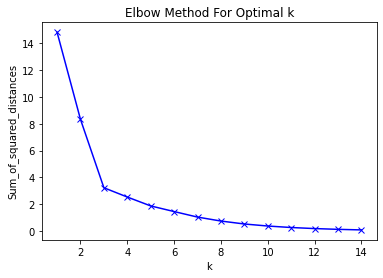

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
k_means = KMeans(n_clusters=3)
k_means.fit(data_transformed)

KMeans(n_clusters=3)

In [15]:
clusters = k_means.fit_predict(data_transformed)

In [16]:
clusters

array([1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2], dtype=int32)

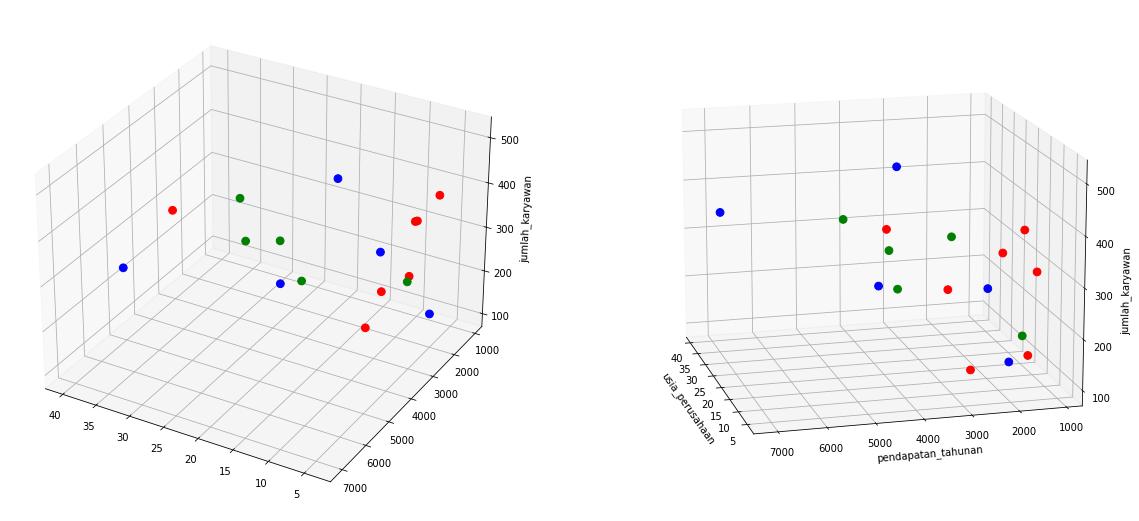

In [17]:
data["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data.usia_perusahaan[data.label == 0], 
           data["pendapatan_tahunan"][data.label == 0], 
           data["jumlah_karyawan"][data.label == 0], 
           c='blue', s=60, alpha=1)
ax.scatter(data.usia_perusahaan[data.label == 1], 
           data["pendapatan_tahunan"][data.label == 1], 
           data["jumlah_karyawan"][data.label == 1], 
           c='red', s=60, alpha=1)
ax.scatter(data.usia_perusahaan[data.label == 2], 
           data["pendapatan_tahunan"][data.label == 2], 
           data["jumlah_karyawan"][data.label == 2], 
           c='green', s=60, alpha=1)
ax.view_init(30, 120)
ax.set_zlabel('jumlah_karyawan')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(data.usia_perusahaan[data.label == 0], 
           data["pendapatan_tahunan"][data.label == 0], 
           data["jumlah_karyawan"][data.label == 0], 
           c='blue', s=60, alpha=1)
ax.scatter(data.usia_perusahaan[data.label == 1], 
           data["pendapatan_tahunan"][data.label == 1], 
           data["jumlah_karyawan"][data.label == 1], 
           c='red', s=60, alpha=1)
ax.scatter(data.usia_perusahaan[data.label == 2], 
           data["pendapatan_tahunan"][data.label == 2], 
           data["jumlah_karyawan"][data.label == 2], 
           c='green', s=60, alpha=1)
ax.view_init(15,165)
ax.set_zlabel('jumlah_karyawan')

plt.xlabel("usia_perusahaan")
plt.ylabel("pendapatan_tahunan")

plt.show()

In [18]:
data.simbol[data.label == 1]

0     o
1     o
2     o
3     o
5     o
9     o
13    o
Name: simbol, dtype: object